In [1]:
# Task 1: Data Loading & Exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("customer_churn_data.csv")

# Basic info
print(df.shape)
print(df.info())
print(df.isnull().sum())
df.describe(include="all").T


(10000, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv           10000 non-null  obje

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,10000,10000,CUST_009984,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,44.6625,14.397976,18.0,34.0,44.0,55.0,80.0
gender,10000,2,Male,5090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
senior_citizen,10000.0,NaN,NaN,NaN,0.0923,0.289463,0.0,0.0,0.0,0.0,1.0
partner,10000,2,Yes,5254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,10000,2,No,6991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,10000.0,NaN,NaN,NaN,22.2168,19.963232,1.0,6.0,16.0,33.0,72.0
phone_service,10000,2,Yes,9012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multiple_lines,10000,3,No,5464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internet_service,10000,3,Fiber optic,4452,NaN,NaN,NaN,NaN,NaN,NaN,NaN


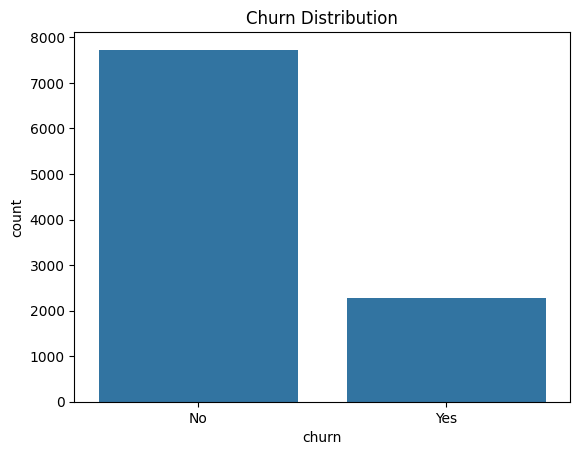

Churn Rate:
 churn
No     0.7728
Yes    0.2272
Name: proportion, dtype: float64


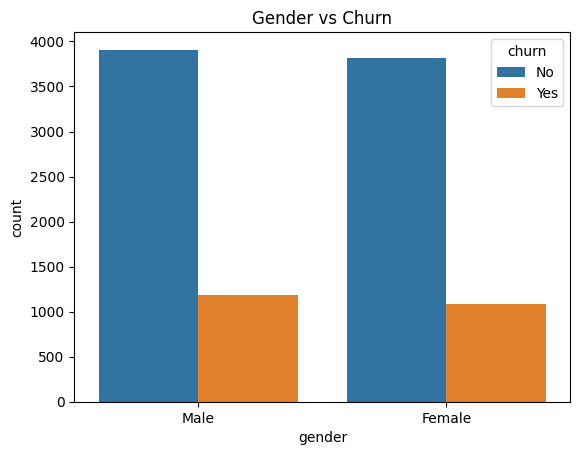

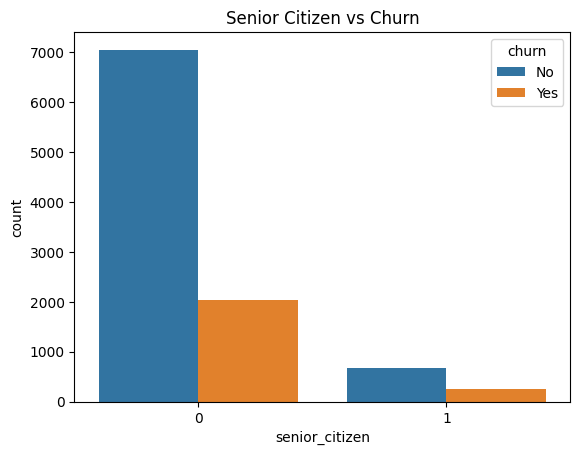

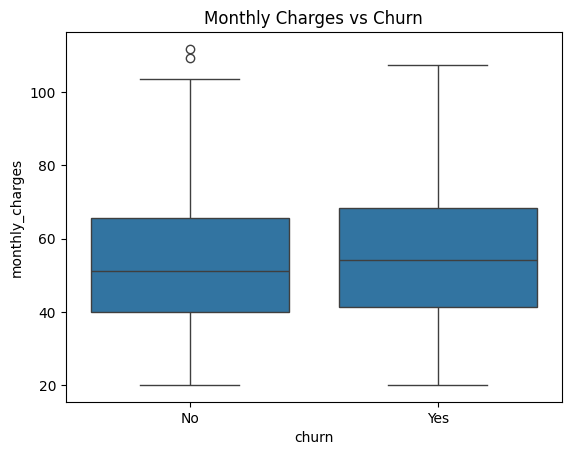

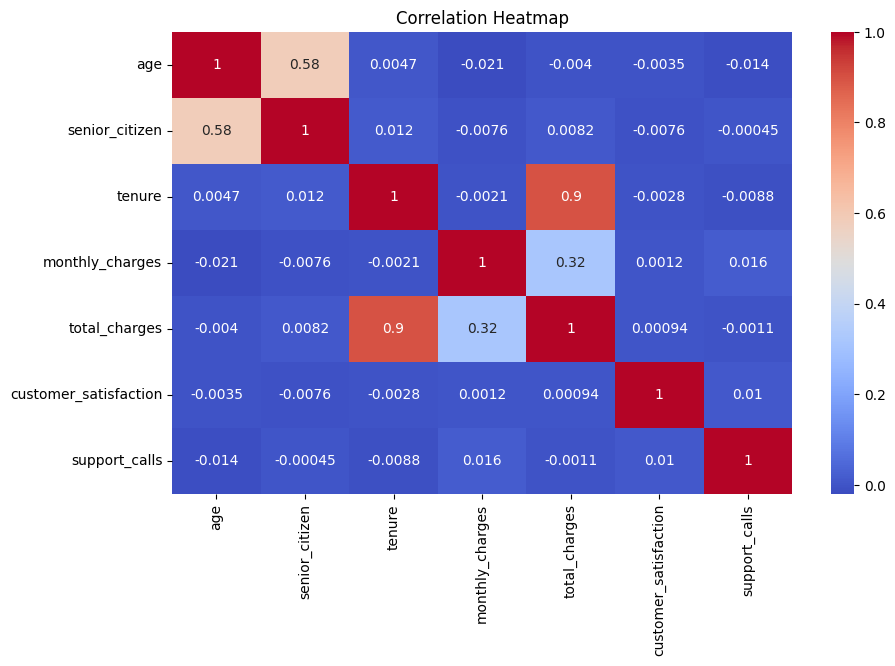

In [2]:
# Task 2: Exploratory Data Analysis (EDA)

# Churn distribution
sns.countplot(data=df, x="churn")
plt.title("Churn Distribution")
plt.show()

# Churn rate
churn_rate = df["churn"].value_counts(normalize=True)
print("Churn Rate:\n", churn_rate)

# Demographic impact
sns.countplot(data=df, x="gender", hue="churn")
plt.title("Gender vs Churn")
plt.show()

sns.countplot(data=df, x="senior_citizen", hue="churn")
plt.title("Senior Citizen vs Churn")
plt.show()

# Financial impact
sns.boxplot(data=df, x="churn", y="monthly_charges")
plt.title("Monthly Charges vs Churn")
plt.show()

# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [3]:
# Task 3: Data Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_prep = df.copy()

# Drop customer_id (not useful)
df_prep = df_prep.drop("customer_id", axis=1)

# Convert total_charges to numeric
df_prep["total_charges"] = pd.to_numeric(df_prep["total_charges"], errors="coerce")

# Handle missing values (if any after conversion)
df_prep = df_prep.fillna(df_prep.median(numeric_only=True))

# Encode categorical features
for col in df_prep.select_dtypes(include="object").columns:
    df_prep[col] = LabelEncoder().fit_transform(df_prep[col])

# Split features/target
X = df_prep.drop("churn", axis=1)
y = df_prep["churn"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (8000, 22)
Test data shape: (2000, 22)


In [4]:
# Task 4: Model Development

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)



Logistic Regression:
Accuracy: 0.7905
Precision: 0.6277372262773723
Recall: 0.1894273127753304
F1 Score: 0.2910321489001692


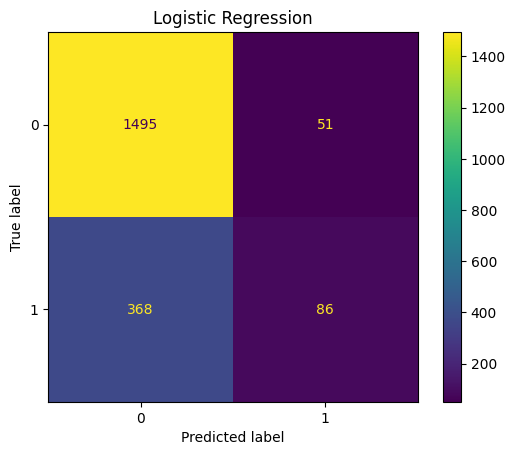


Decision Tree:
Accuracy: 0.7035
Precision: 0.36016096579476864
Recall: 0.394273127753304
F1 Score: 0.3764458464773922


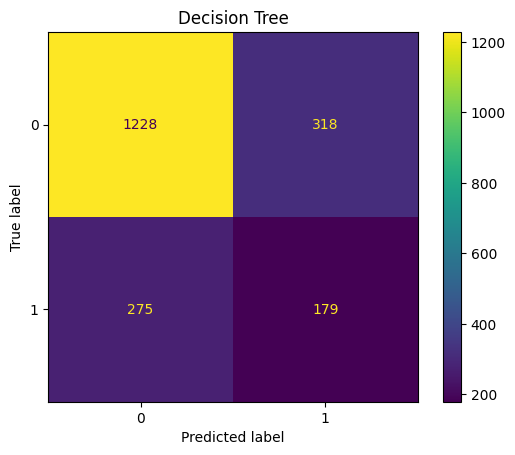


Random Forest:
Accuracy: 0.7945
Precision: 0.6303030303030303
Recall: 0.2290748898678414
F1 Score: 0.3360258481421648


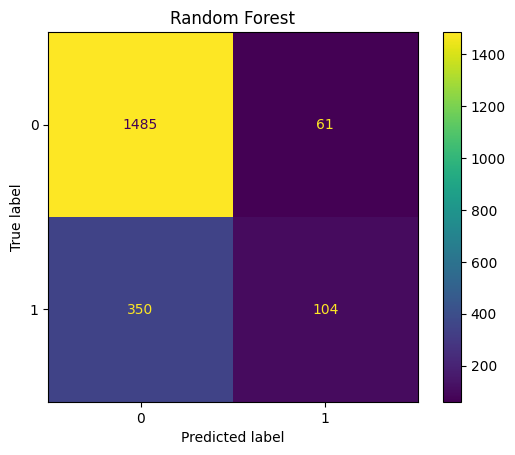


SVM:
Accuracy: 0.776
Precision: 0.5405405405405406
Recall: 0.0881057268722467
F1 Score: 0.15151515151515152


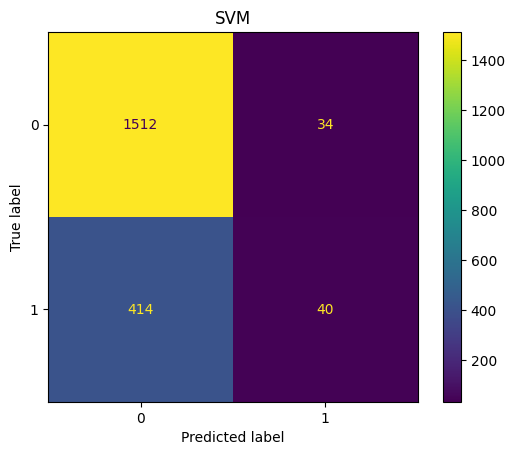


Model Comparison:

                 Model  Accuracy  Precision    Recall        F1
1        Decision Tree    0.7035   0.360161  0.394273  0.376446
2        Random Forest    0.7945   0.630303  0.229075  0.336026
0  Logistic Regression    0.7905   0.627737  0.189427  0.291032
3                  SVM    0.7760   0.540541  0.088106  0.151515


In [5]:
# Task 5: Model Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

    print(f"\n{name}:")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)

    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.title(name)
    plt.show()

# Compare all models
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
print("\nModel Comparison:\n")
print(results_df.sort_values(by="F1", ascending=False))
